In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

In [ ]:
wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])
temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])
rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

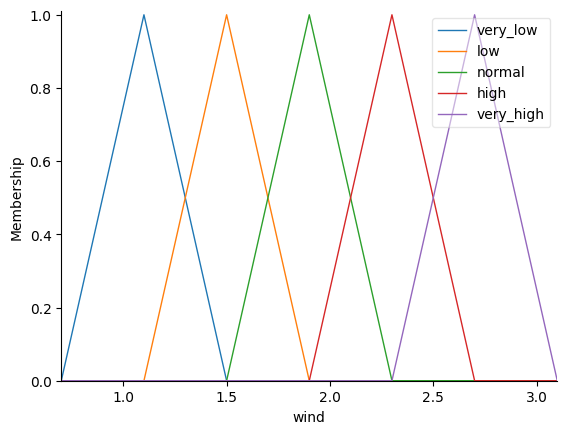

In [ ]:
wind.view()

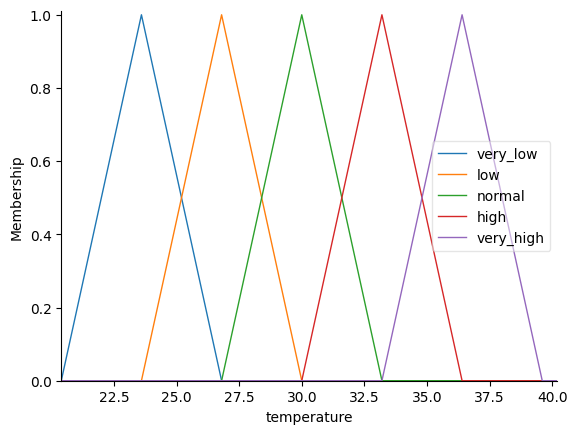

In [ ]:
temperature.view()

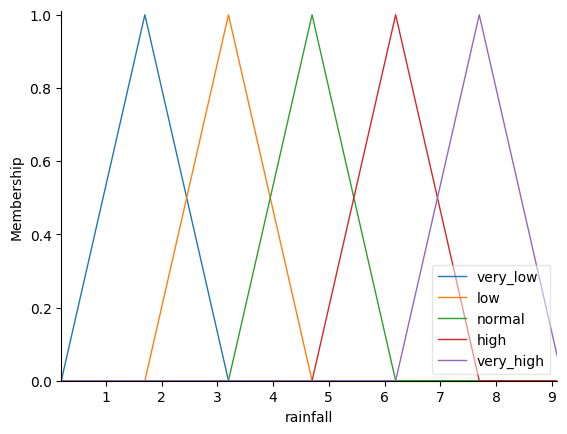

In [ ]:
rainfall.view()

In [ ]:
rule1 = ctrl.Rule(wind['very_low'] & temperature['very_low'], rainfall['very_low'])
rule2 = ctrl.Rule(wind['very_low'] & temperature['low'], rainfall['very_low'])
rule3 = ctrl.Rule(wind['very_low'] & temperature['normal'], rainfall['low'])
rule4 = ctrl.Rule(wind['very_low'] & temperature['high'], rainfall['low'])
rule5 = ctrl.Rule(wind['very_low'] & temperature['very_high'], rainfall['low'])
rule6 = ctrl.Rule(wind['low'] & temperature['very_low'], rainfall['very_low'])
rule7 = ctrl.Rule(wind['low'] & temperature['low'], rainfall['low'])
rule8 = ctrl.Rule(wind['low'] & temperature['normal'], rainfall['normal'])
rule9 = ctrl.Rule(wind['low'] & temperature['high'], rainfall['normal'])
rule10 = ctrl.Rule(wind['low'] & temperature['very_high'], rainfall['normal'])
rule11 = ctrl.Rule(wind['normal'] & temperature['very_low'], rainfall['low'])
rule12 = ctrl.Rule(wind['normal'] & temperature['low'], rainfall['normal'])
rule13 = ctrl.Rule(wind['normal'] & temperature['normal'], rainfall['normal'])
rule14 = ctrl.Rule(wind['normal'] & temperature['high'], rainfall['normal'])
rule15 = ctrl.Rule(wind['normal'] & temperature['very_high'], rainfall['normal'])
rule16 = ctrl.Rule(wind['high'] & temperature['very_low'], rainfall['normal'])
rule17 = ctrl.Rule(wind['high'] & temperature['low'], rainfall['normal'])
rule18 = ctrl.Rule(wind['high'] & temperature['normal'], rainfall['high'])
rule19 = ctrl.Rule(wind['high'] & temperature['high'], rainfall['high'])
rule20 = ctrl.Rule(wind['high'] & temperature['very_high'], rainfall['high'])
rule21 = ctrl.Rule(wind['very_high'] & temperature['very_low'], rainfall['normal'])
rule22 = ctrl.Rule(wind['very_high'] & temperature['low'], rainfall['normal'])
rule23 = ctrl.Rule(wind['very_high'] & temperature['normal'], rainfall['high'])
rule24 = ctrl.Rule(wind['very_high'] & temperature['high'], rainfall['high'])
rule25 = ctrl.Rule(wind['very_high'] & temperature['very_high'], rainfall['high'])

5.765541330527304


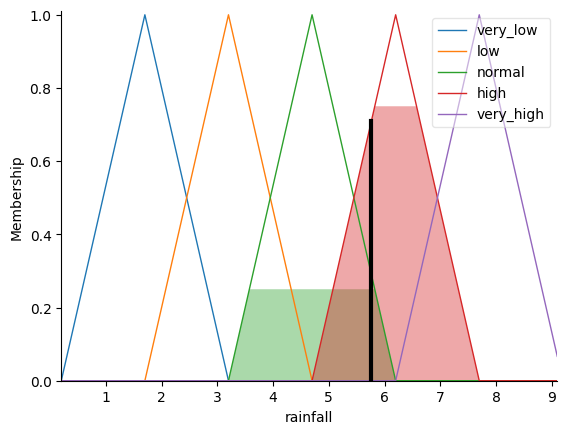

In [ ]:
rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['wind'] = 2.2
rainfalling.input['temperature'] = 30
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)